## Name : Kamaleshwar Viyanwar
## batch : C3
## Roll No : 43

In [3]:
# Part 1: Dataset Generation
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


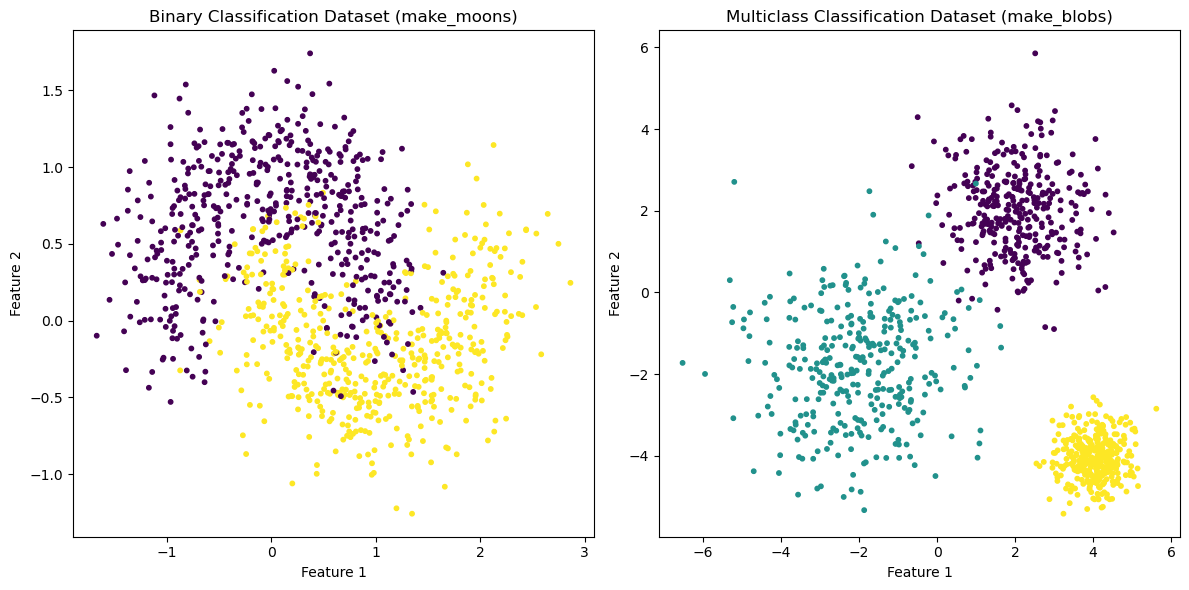

In [15]:
# Updated Dataset Generation
binary_X, binary_y = make_moons(n_samples=1000, noise=0.3, random_state=42)  # Increased noise for more challenge
multi_X, multi_y = make_blobs(
    n_samples=1000,
    centers=[[2, 2, 2, 2], [-2, -2, -2, -2], [4, -4, 4, -4]],  # Specific blob centers
    cluster_std=[1.0, 1.5, 0.5],  # Varying cluster standard deviations
    n_features=4,
    random_state=42
)

# Splitting datasets
binary_X_train, binary_X_test, binary_y_train, binary_y_test = train_test_split(binary_X, binary_y, test_size=0.2, random_state=42)
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, multi_y, test_size=0.2, random_state=42)

# One-hot encoding for multiclass labels
encoder = OneHotEncoder(sparse_output=False)
multi_y_train_encoded = encoder.fit_transform(multi_y_train.reshape(-1, 1))
multi_y_test_encoded = encoder.transform(multi_y_test.reshape(-1, 1))

# Visualizing datasets
plt.figure(figsize=(12, 6))

# Binary Classification Dataset
plt.subplot(1, 2, 1)
plt.scatter(binary_X[:, 0], binary_X[:, 1], c=binary_y, cmap="viridis", s=10)
plt.title("Binary Classification Dataset (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Multiclass Classification Dataset
plt.subplot(1, 2, 2)
plt.scatter(multi_X[:, 0], multi_X[:, 1], c=multi_y, cmap="viridis", s=10)
plt.title("Multiclass Classification Dataset (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [16]:
# Part 3: Training Function
# Training function
def train(X, y, layers, activation_functions, activation_derivatives, loss_function, loss_derivative, epochs=1000, lr=0.01):
    weights, biases = initialize_weights(layers)
    losses = []
    for epoch in range(epochs):
        activations = feedforward(X, weights, biases, activation_functions)
        loss = loss_function(y, activations[-1])
        losses.append(loss)
        weight_grads, bias_grads = backpropagate(activations, y, weights, biases, activation_derivatives, loss_derivative)
        update_weights(weights, biases, weight_grads, bias_grads, lr)
    return weights, biases, losses


In [17]:
# Part 4: Binary Classification Training
binary_layers = [2, 4, 1]
binary_activation_functions = [sigmoid, sigmoid]
binary_activation_derivatives = [sigmoid_derivative, sigmoid_derivative]

binary_weights, binary_biases, binary_losses = train(
    binary_X_train, binary_y_train.reshape(-1, 1),
    binary_layers, binary_activation_functions,
    binary_activation_derivatives, mean_squared_error,
    lambda y_true, y_pred: y_pred - y_true,
    epochs=1000, lr=0.1
)

C:\Users\cse\AppData\Local\Temp\ipykernel_5164\3482037016.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [18]:
# Part 5: Multiclass Classification Training
multi_layers = [4, 3, 4, 3]
multi_activation_functions = [sigmoid, sigmoid, softmax]
multi_activation_derivatives = [sigmoid_derivative, sigmoid_derivative]

multi_weights, multi_biases, multi_losses = train(
    multi_X_train, multi_y_train_encoded,
    multi_layers, multi_activation_functions,
    multi_activation_derivatives, binary_cross_entropy,
    lambda y_true, y_pred: -(y_true - y_pred),
    epochs=1000, lr=0.1
)

C:\Users\cse\AppData\Local\Temp\ipykernel_5164\3482037016.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


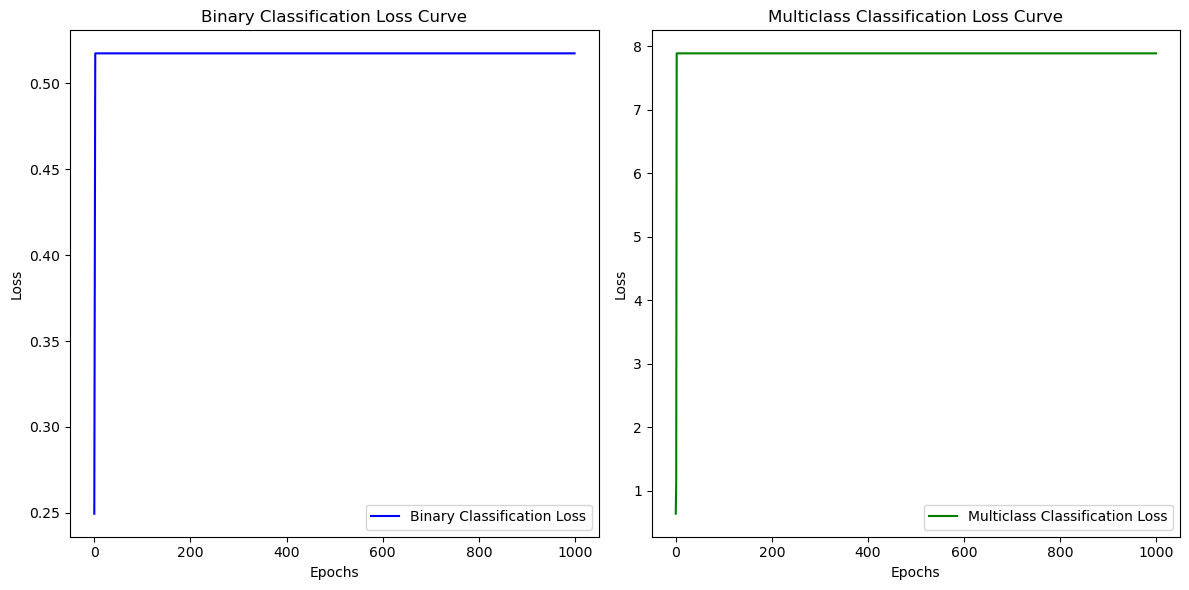

Binary Classification Final Loss: 0.5175
Multiclass Classification Final Loss: 7.8902


In [13]:
# Part 6: Results
# Plotting loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Binary Classification Loss Curve
plt.subplot(1, 2, 1)
plt.plot(binary_losses, label="Binary Classification Loss", color="blue")
plt.title("Binary Classification Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Multiclass Classification Loss Curve
plt.subplot(1, 2, 2)
plt.plot(multi_losses, label="Multiclass Classification Loss", color="green")
plt.title("Multiclass Classification Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Print final losses
print(f"Binary Classification Final Loss: {binary_losses[-1]:.4f}")
print(f"Multiclass Classification Final Loss: {multi_losses[-1]:.4f}")
